# Explorative Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from copy import deepcopy
import numpy as np

## Passenger data

### 60 min

In [2]:
df_60 = pd.read_csv('data/data60.csv', sep=',')
train60 = df_60[df_60['date'] < '2023-09-01']
train60.head(10)

,date,hour,peakHour,year,quarter,Q1,Q2,Q3,Q4,month,...,bright_sunshine,mean_cloud_cover,mean_pressure,mean_relative_hum,mean_temp,mean_wind_speed,snow_depth,datetime,eventName,event
0,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
1,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
2,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
3,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
4,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
5,2020-01-01,0,0,2020,1,1,0,0,0,Januar,...,0.0,59.0,1030.8,86.2,3.2,3.3,0.0,2020-01-01 00:00:00,[],0
6,2020-01-01,1,0,2020,1,1,0,0,0,Januar,...,0.0,80.0,1030.4,84.3,3.7,3.7,0.0,2020-01-01 01:00:00,[],0
7,2020-01-01,1,0,2020,1,1,0,0,0,Januar,...,0.0,80.0,1030.4,84.3,3.7,3.7,0.0,2020-01-01 01:00:00,[],0
8,2020-01-01,1,0,2020,1,1,0,0,0,Januar,...,0.0,80.0,1030.4,84.3,3.7,3.7,0.0,2020-01-01 01:00:00,[],0
9,2020-01-01,1,0,2020,1,1,0,0,0,Januar,...,0.0,80.0,1030.4,84.3,3.7,3.7,0.0,2020-01-01 01:00:00,[],0


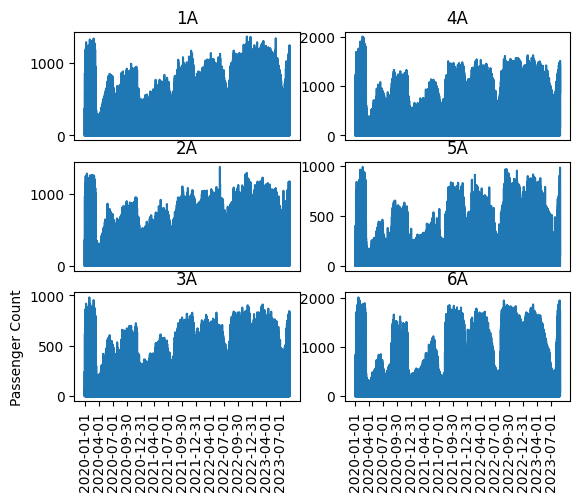

In [3]:
# inspect passenger count

# specific line for all dates
df1A = train60[train60['line'] == '1A'].reset_index()
df2A = train60[train60['line'] == '2A'].reset_index()
df3A = train60[train60['line'] == '3A'].reset_index()
df4A = train60[train60['line'] == '4A'].reset_index()
df5A = train60[train60['line'] == '5A'].reset_index()
df6A = train60[train60['line'] == '6A'].reset_index()

# show only n dates per year
dateInterval = int(365*24/4)

fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(df1A.index, df1A['passengersBoarding'], '-')
ax[0, 0].set_title('1A')
ax[0, 0].set_xticks([])

ax[1, 0].plot(df2A.index, df2A['passengersBoarding'], '-')
ax[1, 0].set_title('2A')
ax[1, 0].set_xticks([])

ax[2, 0].plot(df3A.index, df3A['passengersBoarding'], '-')
ax[2, 0].set_title('3A')
ax[2, 0].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)
ax[2, 0].set_ylabel('Passenger Count')

ax[0, 1].plot(df4A.index, df4A['passengersBoarding'], '-')
ax[0, 1].set_title('4A')
ax[0, 1].set_xticks([])

ax[1, 1].plot(df5A.index, df5A['passengersBoarding'], '-')
ax[1, 1].set_title('5A')
ax[1, 1].set_xticks([])

ax[2, 1].plot(df6A.index, df6A['passengersBoarding'], '-')
ax[2, 1].set_title('6A')
ax[2, 1].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)

plt.show()

We see a sharp decline at 2020-04-01 due to COVID19.

We see sharp declines at what might be vacations.

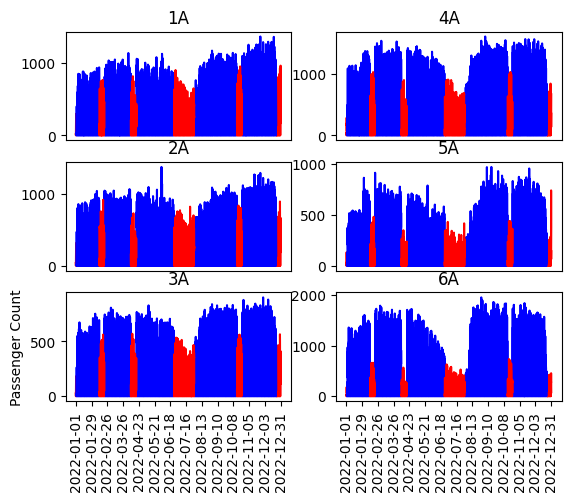

In [4]:
# same as above from 2022-01-01 to 2022-12-31 with vacations colored in red
# specific line for all dates
df_subset = deepcopy(train60)
df_subset['isVacation'] = df_subset['fallVacation'] + df_subset['christmasVacation'] + df_subset['winterVacation'] + df_subset['easterVacation'] + df_subset['summerVacation']

df1A = df_subset[(df_subset['line'] == '1A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()
df2A = df_subset[(df_subset['line'] == '2A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()
df3A = df_subset[(df_subset['line'] == '3A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()
df4A = df_subset[(df_subset['line'] == '4A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()
df5A = df_subset[(df_subset['line'] == '5A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()
df6A = df_subset[(df_subset['line'] == '6A') & (df_subset['date'] >= '2022-01-01') & (df_subset['date'] <= '2022-12-31')].reset_index()

# show only n dates per year
dateInterval = int(365*24/13)

fig, ax = plt.subplots(3, 2)
for col, label, color in [('christmasVacation', 1, 'red'), ('isVacation', 0, 'blue'), ('fallVacation', 1, 'red'), ('winterVacation', 1, 'red'), ('easterVacation', 1, 'red'), ('summerVacation', 1, 'red')]:
    df_subset = df1A[df1A[col] == label]
    ax[0, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[0, 0].set_title('1A')
    ax[0, 0].set_xticks([])

    df_subset = df2A[df2A[col] == label]
    ax[1, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[1, 0].set_title('2A')
    ax[1, 0].set_xticks([])

    df_subset = df3A[df3A[col] == label]
    ax[2, 0].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[2, 0].set_title('3A')
    ax[2, 0].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)
    ax[2, 0].set_ylabel('Passenger Count')

    df_subset = df4A[df4A[col] == label]
    ax[0, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[0, 1].set_title('4A')
    ax[0, 1].set_xticks([])

    df_subset = df5A[df5A[col] == label]
    ax[1, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[1, 1].set_title('5A')
    ax[1, 1].set_xticks([])

    df_subset = df6A[df6A[col] == label]
    ax[2, 1].plot(df_subset.index, df_subset['passengersBoarding'], '-', c=color, label=label)
    ax[2, 1].set_title('6A')
    ax[2, 1].set_xticks([i for i in range(0, df6A.shape[0], dateInterval)], df6A['date'][::dateInterval], rotation=90)

plt.show()

It's obvious that school vacations heavily influence passengers.

In [5]:
# check if the busiest hours outside of peak hours have any events
# 1A, AGF_W, Northside, Regatta, Aarhus Festival high place
# 2A, Groen, Northside, Aarhus Festival high place and Regatta, AGF_M low place
# 3A, AGF_M, Aarhus Festival 5th place
# 4A, Aarhus Festival, Regatta high place and AGF_M, Aarhus Festival low
# 5A, Fed Fredag, Regatta, Aarhus Festival high place
# 6A, Northside at 12th and 14th place

df_subset = deepcopy(train60)
df_subset = df_subset[df_subset['date'] >= '2023-01-01'].reset_index()
df_subset = df_subset[df_subset['line'] == '6A']
df_subset = df_subset[df_subset['peakHour'] == 0]
df_subset = df_subset.reset_index()

df_subset.nlargest(15, 'passengersBoarding')

,level_0,index,date,hour,peakHour,year,quarter,Q1,Q2,Q3,...,bright_sunshine,mean_cloud_cover,mean_pressure,mean_relative_hum,mean_temp,mean_wind_speed,snow_depth,datetime,eventName,event
3107,24989,182813,2023-06-23,12,0,2023,2,0,1,0,...,8.7,1.0,1018.9,52.0,19.6,3.9,0.0,2023-06-23 12:00:00,[],0
1199,9869,167693,2023-03-10,12,0,2023,1,1,0,0,...,6.8,23.0,995.0,70.0,1.5,2.0,0.6,2023-03-10 12:00:00,[],0
1076,8861,166685,2023-03-03,12,0,2023,1,1,0,0,...,54.9,1.0,1020.5,86.5,4.8,3.3,0.0,2023-03-03 12:00:00,[],0
1964,15917,173741,2023-04-21,12,0,2023,2,0,1,0,...,60.0,0.0,1024.6,35.0,13.3,4.3,0.0,2023-04-21 12:00:00,[],0
2342,18941,176765,2023-05-12,12,0,2023,2,0,1,0,...,59.4,0.0,1024.2,42.9,18.1,3.1,0.0,2023-05-12 12:00:00,[],0
583,4823,162647,2023-02-03,11,0,2023,1,1,0,0,...,4.5,83.0,1005.3,78.7,6.4,10.1,0.0,2023-02-03 11:00:00,[],0
952,7847,165671,2023-02-24,11,0,2023,1,1,0,0,...,8.6,54.0,993.2,83.9,5.4,5.0,0.0,2023-02-24 11:00:00,[],0
706,5831,163655,2023-02-10,11,0,2023,1,1,0,0,...,17.9,87.0,1027.6,88.3,5.2,3.8,0.0,2023-02-10 11:00:00,[],0
2165,17501,175325,2023-05-02,12,0,2023,2,0,1,0,...,35.1,65.0,1020.5,50.2,9.7,3.3,0.0,2023-05-02 12:00:00,[],0
1322,10877,168701,2023-03-17,12,0,2023,1,1,0,0,...,5.3,83.0,1007.1,75.1,6.4,5.4,0.0,2023-03-17 12:00:00,[],0


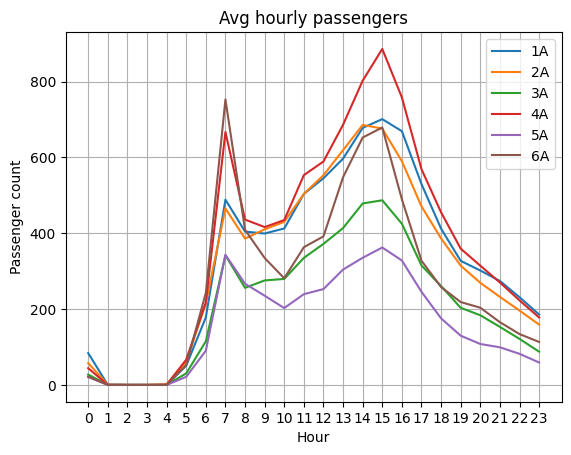

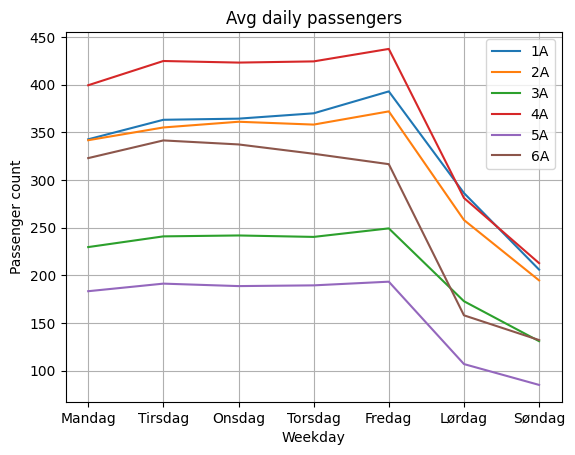

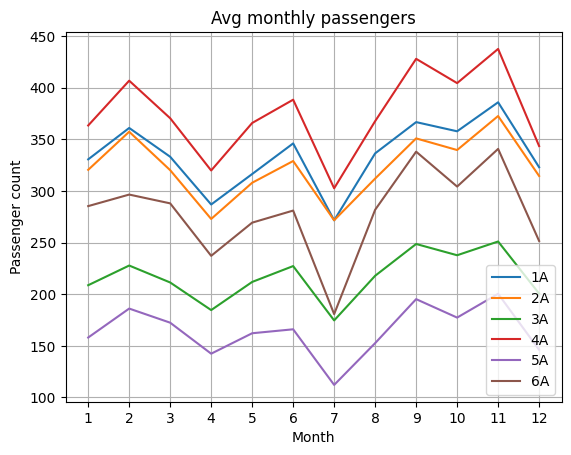

In [6]:
# summary statistics
lines = ['1A', '2A', '3A', '4A', '5A', '6A']
days = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']
months = range(1, 12+1)
hours = range(0, 23+1)

summaryTable = train60.groupby(['line', 'hour'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, h) for l in lines for h in hours])
#print(summaryTable)
summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')
plt.xticks(hours)
plt.grid()
plt.legend()
plt.title('Avg hourly passengers')
plt.xlabel('Hour')
plt.ylabel('Passenger count')
plt.show()


summaryTable = train60.groupby(['line', 'weekDay'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, d) for l in lines for d in days])
#print(summaryTable)
summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')
plt.grid()
plt.legend()
plt.title('Avg daily passengers')
plt.xlabel('Weekday')
plt.ylabel('Passenger count')
plt.show()


summaryTable = train60.groupby(['line', 'monthNumber'])['passengersBoarding'].mean()
summaryTable = summaryTable.reindex(index=[(l, m) for l in lines for m in months])
#print(summaryTable)
summaryTable['1A'].plot(label='1A')
summaryTable['2A'].plot(label='2A')
summaryTable['3A'].plot(label='3A')
summaryTable['4A'].plot(label='4A')
summaryTable['5A'].plot(label='5A')
summaryTable['6A'].plot(label='6A')
plt.xticks(months)
plt.grid()
plt.legend()
plt.title('Avg monthly passengers')
plt.xlabel('Month')
plt.ylabel('Passenger count')
plt.show()

### 30 min

In [7]:
df_pas30min = pd.read_csv('Data/PassengerData/Passenger30min.csv', sep=';')
df_pas30min.head()

,date,hour,interval30,line,passengersBoarding
0,2020-01-01,6,0,1A,12
1,2020-01-01,6,30,1A,87
2,2020-01-01,7,0,1A,51
3,2020-01-01,7,30,1A,37
4,2020-01-01,8,0,1A,42


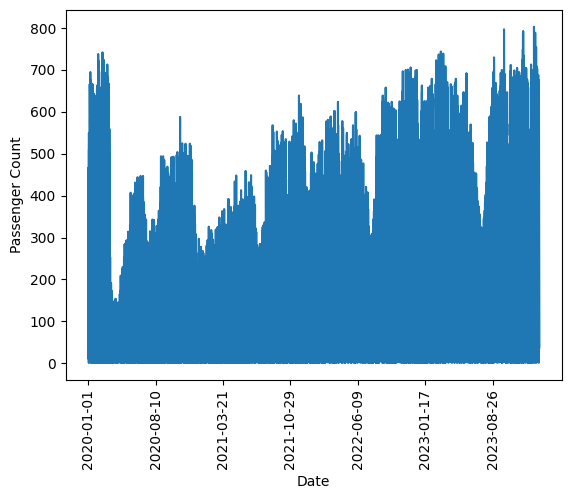

In [8]:
# specific line for all dates
df_subset = df_pas30min.loc[(df_pas30min['line'] == '1A') & (df_pas30min['date'] >= '2020-01-01')]
df_subset = df_subset.reset_index()

# show only n dates per year
dateInterval = int(365*24/1)
plt.plot(df_subset.index, df_subset['passengersBoarding'], '-')
plt.xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['date'][::dateInterval], rotation=90)
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

### 15 min

In [9]:
df_pas15min = pd.read_csv('Data/PassengerData/Passenger15min.csv', sep=';')
df_pas15min.head()

,date,hour,interval15,line,passengersBoarding
0,2020-01-01,6,15,1A,12
1,2020-01-01,6,30,1A,36
2,2020-01-01,6,45,1A,51
3,2020-01-01,7,0,1A,25
4,2020-01-01,7,15,1A,26


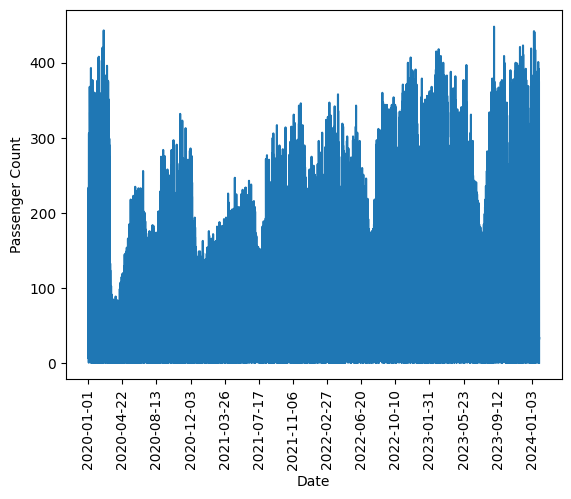

In [10]:
# specific line for all dates
df_subset = df_pas15min.loc[(df_pas15min['line'] == '1A') & (df_pas15min['date'] >= '2020-01-01')]
df_subset = df_subset.reset_index()

# show only n dates per year
dateInterval = int(365*24/1)
plt.plot(df_subset.index, df_subset['passengersBoarding'], '-')
plt.xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['date'][::dateInterval], rotation=90)
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

## ClimateData

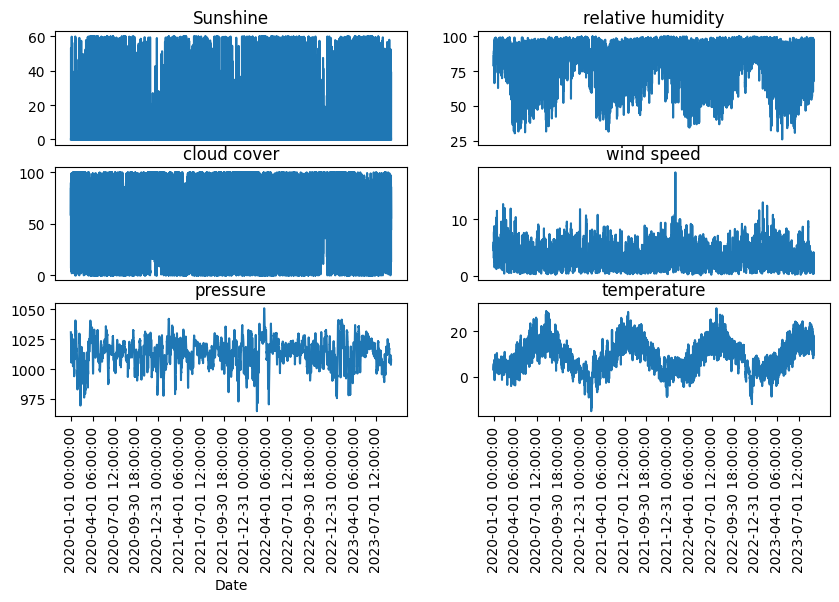

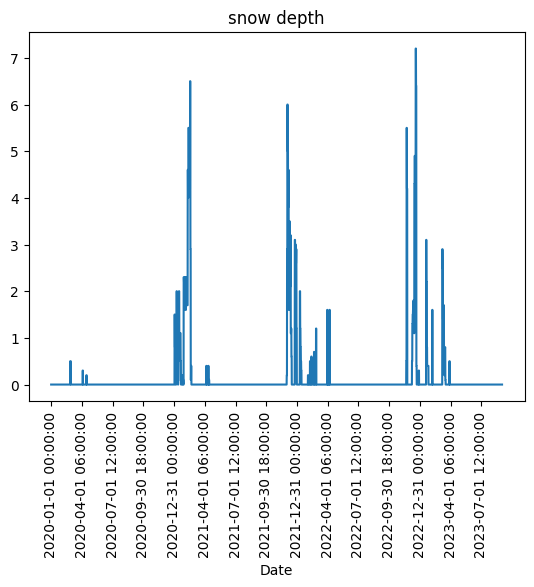

In [11]:
# show weather parameters in train set

df_subset = deepcopy(train60[train60['line'] == '1A'])
df_subset = df_subset.reset_index()

dateInterval = int(365*24/4)
fig, ax = plt.subplots(3, 2, figsize=(10, 5))

ax[0, 0].plot(df_subset.index, df_subset['bright_sunshine'], '-')
ax[0, 0].set_title('Sunshine')
ax[0, 0].set_xticks([])

ax[1, 0].plot(df_subset.index, df_subset['mean_cloud_cover'], '-')
ax[1, 0].set_title('cloud cover')
ax[1, 0].set_xticks([])

ax[2, 0].plot(df_subset.index, df_subset['mean_pressure'], '-')
ax[2, 0].set_xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['datetime'][::dateInterval], rotation=90)
ax[2, 0].set_xlabel('Date')
ax[2, 0].set_title('pressure')

ax[0, 1].plot(df_subset.index, df_subset['mean_relative_hum'], '-')
ax[0, 1].set_title('relative humidity')
ax[0, 1].set_xticks([])

ax[1, 1].plot(df_subset.index, df_subset['mean_wind_speed'], '-')
ax[1, 1].set_title('wind speed')
ax[1, 1].set_xticks([])

ax[2, 1].plot(df_subset.index, df_subset['mean_temp'], '-')
ax[2, 1].set_xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['datetime'][::dateInterval], rotation=90)
ax[2, 1].set_title('temperature')

plt.show()


fig, ax = plt.subplots()
ax.plot(df_subset.index, df_subset['snow_depth'], '-')
ax.set_xticks([i for i in range(0, df_subset.shape[0], dateInterval)], df_subset['datetime'][::dateInterval], rotation=90)
ax.set_xlabel('Date')
ax.set_title('snow depth')
plt.show()

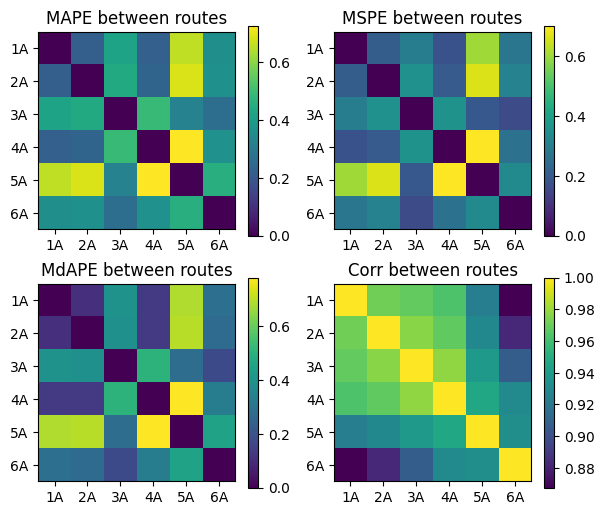

In [25]:
# plot correlation metrics
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError, MedianAbsolutePercentageError, MeanSquaredPercentageError

lines = ['1A', '2A', '3A', '4A', '5A', '6A']
dfdict = {line: train60[train60['line'] == line]['passengersBoarding'].values for line in lines}

df = pd.DataFrame(dfdict)

dfMAPE = df.corr()
dfMAE = df.corr()
dfMSE = df.corr()

MAPE = MeanAbsolutePercentageError(symmetric=True)
MdAPE = MedianAbsolutePercentageError(symmetric=True)
MSPE = MeanSquaredPercentageError(symmetric=True)

for line1 in lines:
    for line2 in lines:
        line1values = dfdict[line1]
        line2values = dfdict[line2]
        dfMAPE.loc[line1, line2] = MAPE(line1values, line2values)
        dfMAE.loc[line1, line2] = MdAPE(line1values, line2values)
        dfMSE.loc[line1, line2] = MSPE(line1values, line2values)

fig, ax = plt.subplots(2, 2, figsize=(7, 6))

im00 = ax[0, 0].imshow(dfMAPE)
ax[0, 0].set_xticks(range(0, 5+1), lines)
ax[0, 0].set_yticks(range(0, 5+1), lines)
ax[0, 0].set_title('MAPE between routes')
fig.colorbar(im00)

im10 = ax[1, 0].imshow(dfMAE)
ax[1, 0].set_xticks(range(0, 5+1), lines)
ax[1, 0].set_yticks(range(0, 5+1), lines)
ax[1, 0].set_title('MdAPE between routes')
fig.colorbar(im10)

im01 = ax[0, 1].imshow(dfMSE)
ax[0, 1].set_xticks(range(0, 5+1), lines)
ax[0, 1].set_yticks(range(0, 5+1), lines)
ax[0, 1].set_title('MSPE between routes')
fig.colorbar(im01)

im11 = ax[1, 1].imshow(df.corr())
ax[1, 1].set_xticks(range(0, 5+1), lines)
ax[1, 1].set_yticks(range(0, 5+1), lines)
ax[1, 1].set_title('Corr between routes')
fig.colorbar(im11)

plt.show()